<a href="https://colab.research.google.com/github/accenggg/data-mining/blob/main/063_Michael_Arselius_P_Apriori_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import seaborn as sns
#  import sckitlearn

#Apriori(GAGAL)

In [54]:
with open ('dataset.txt') as file:
  raw_data = file.read()

raw_data

'Bread,Corn,Dill,Ice cream,Sugar,Yogurt,chocolate\nMilk\nApple,Butter,Dill,Ice cream,Milk,Yogurt,chocolate\nButter,Cheese,Dill,Milk,Nutmeg,Onion\nApple,Bread\nApple,Bread,Butter,Cheese,Dill,Ice cream,\nButter,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg\nApple,Cheese,Eggs,Nutmeg,Sugar,Yogurt\nApple,Corn,Nutmeg,Onion,Yogurt,chocolate\nApple,Dill,Eggs,Ice cream,Milk,Onion'

In [58]:
data = raw_data.split("\n")

In [59]:
data

['Bread,Corn,Dill,Ice cream,Sugar,Yogurt,chocolate',
 'Milk',
 'Apple,Butter,Dill,Ice cream,Milk,Yogurt,chocolate',
 'Butter,Cheese,Dill,Milk,Nutmeg,Onion',
 'Apple,Bread',
 'Apple,Bread,Butter,Cheese,Dill,Ice cream,',
 'Butter,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg',
 'Apple,Cheese,Eggs,Nutmeg,Sugar,Yogurt',
 'Apple,Corn,Nutmeg,Onion,Yogurt,chocolate',
 'Apple,Dill,Eggs,Ice cream,Milk,Onion']

In [60]:
dataset = [item.split(",") for item in data]

In [61]:
dataset

[['Bread', 'Corn', 'Dill', 'Ice cream', 'Sugar', 'Yogurt', 'chocolate'],
 ['Milk'],
 ['Apple', 'Butter', 'Dill', 'Ice cream', 'Milk', 'Yogurt', 'chocolate'],
 ['Butter', 'Cheese', 'Dill', 'Milk', 'Nutmeg', 'Onion'],
 ['Apple', 'Bread'],
 ['Apple', 'Bread', 'Butter', 'Cheese', 'Dill', 'Ice cream', ''],
 ['Butter', 'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg'],
 ['Apple', 'Cheese', 'Eggs', 'Nutmeg', 'Sugar', 'Yogurt'],
 ['Apple', 'Corn', 'Nutmeg', 'Onion', 'Yogurt', 'chocolate'],
 ['Apple', 'Dill', 'Eggs', 'Ice cream', 'Milk', 'Onion']]

In [62]:
# ubah list dataset jadi tabulasi
col = set()
for trc in dataset:
  for item in trc:
      col.add(item)

col

{'',
 'Apple',
 'Bread',
 'Butter',
 'Cheese',
 'Corn',
 'Dill',
 'Eggs',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Sugar',
 'Yogurt',
 'chocolate'}

In [101]:
data = []
print(data)
for i in dataset:
  # print(data)
  for item in i:
    if item in data[item]:
      print("ok")


[]


TypeError: ignored

#Apriori CSV

In [66]:
df = pd.read_csv ("DatasetBaru - Sheet1.csv")


,Bread,Eggs,Yogurt,Milk,Corn,Ice Cream,Apple,Cheese,Nutmeg,Dill,Onion,Butter,Sugar,Kidney Beans
0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
6,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
7,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bread         3 non-null      float64
 1   Eggs          1 non-null      float64
 2   Yogurt        3 non-null      float64
 3   Milk          2 non-null      float64
 4   Corn          6 non-null      float64
 5   Ice Cream     5 non-null      float64
 6   Apple         5 non-null      float64
 7   Cheese        2 non-null      float64
 8   Nutmeg        4 non-null      float64
 9   Dill          3 non-null      float64
 10  Onion         3 non-null      float64
 11  Butter        4 non-null      float64
 12  Sugar         3 non-null      float64
 13  Kidney Beans  2 non-null      float64
dtypes: float64(14)
memory usage: 1.2 KB


In [72]:
df.columns

Index(['Bread', 'Eggs', 'Yogurt', 'Milk', 'Corn', 'Ice Cream', 'Apple',
       'Cheese', 'Nutmeg', 'Dill', 'Onion', 'Butter', 'Sugar', 'Kidney Beans'],
      dtype='object')

In [78]:
from itertools import permutations
# ekstark uniq item
rules = list(permutations(df.columns, 2))

In [91]:
hitung = []
for rule in rules:
  banyak_data = len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
  ])
  hitung.append(banyak_data)

hitung

[0,
 3,
 0,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 0,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 4,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 3,
 0,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 3,
 0,
 0,
 1,
 0,
 1,
 4,
 1,
 1,
 3,
 2,
 2,
 4,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 4,
 0,
 4,
 1,
 2,
 2,
 1,
 0,
 2,
 3,
 0,
 3,
 0,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0]

In [94]:
# LIST SUPPORT
print ([i/len(df)*100 for i in hitung])

[0.0, 30.0, 0.0, 20.0, 30.0, 0.0, 10.0, 10.0, 10.0, 10.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 0.0, 10.0, 0.0, 10.0, 30.0, 0.0, 0.0, 20.0, 30.0, 0.0, 10.0, 10.0, 10.0, 10.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 0.0, 10.0, 0.0, 10.0, 0.0, 0.0, 0.0, 20.0, 10.0, 20.0, 0.0, 20.0, 40.0, 20.0, 20.0, 30.0, 20.0, 40.0, 20.0, 20.0, 30.0, 0.0, 30.0, 10.0, 20.0, 10.0, 10.0, 20.0, 10.0, 20.0, 0.0, 30.0, 0.0, 0.0, 10.0, 0.0, 10.0, 40.0, 10.0, 10.0, 30.0, 20.0, 20.0, 40.0, 0.0, 20.0, 10.0, 0.0, 10.0, 0.0, 20.0, 10.0, 10.0, 0.0, 10.0, 10.0, 10.0, 10.0, 0.0, 10.0, 10.0, 10.0, 10.0, 20.0, 20.0, 30.0, 0.0, 0.0, 20.0, 20.0, 10.0, 10.0, 10.0, 0.0, 10.0, 0.0, 30.0, 10.0, 20.0, 10.0, 0.0, 0.0, 20.0, 10.0, 10.0, 10.0, 0.0, 10.0, 10.0, 20.0, 20.0, 20.0, 10.0, 20.0, 0.0, 10.0, 10.0, 0.0, 0.0, 10.0, 0.0, 0.0, 40.0, 0.0, 40.0, 10.0, 20.0, 20.0, 10.0, 0.0, 20.0, 30.0, 0.0, 30.0, 0.0, 20.0, 30.0, 0.0, 10.0, 10.0, 10.0, 10.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 20.0, 0.0, 20.0, 0.0,

In [96]:
# List Confiden
print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

[0.0, 100.0, 0.0, 66.66666666666666, 100.0, 0.0, 33.33333333333333, 33.33333333333333, 33.33333333333333, 33.33333333333333, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 100.0, 0.0, 100.0, 100.0, 0.0, 0.0, 66.66666666666666, 100.0, 0.0, 33.33333333333333, 33.33333333333333, 33.33333333333333, 33.33333333333333, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 0.0, 50.0, 0.0, 50.0, 0.0, 0.0, 0.0, 33.33333333333333, 16.666666666666664, 33.33333333333333, 0.0, 33.33333333333333, 66.66666666666666, 33.33333333333333, 33.33333333333333, 50.0, 33.33333333333333, 66.66666666666666, 33.33333333333333, 33.33333333333333, 60.0, 0.0, 60.0, 20.0, 40.0, 20.0, 20.0, 40.0, 20.0, 40.0, 0.0, 60.0, 0.0, 0.0, 20.0, 0.0, 20.0, 80.0, 20.0, 20.0, 60.0, 40.0, 40.0, 80.0, 0.0, 40.0, 50.0, 0.0, 50.0, 0.0, 100.0, 50.0, 50.0, 0.0, 50.0, 50.0, 50.0, 50.0, 0.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 75.0, 0.0, 0.0, 50.0, 50.0, 25.0, 25.0, 33.33333333333333, 0.0, 33.33333333333333, 0.0, 100

#KNN

#CRISP-DM

## Business Undersanding

Goals : mau cari tahu ttg siapa yg selamat dari titanic dan kriterianya.

## Data Understanding

1. Collect Data

In [132]:
df = pd.read_csv("train.csv")

In [133]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

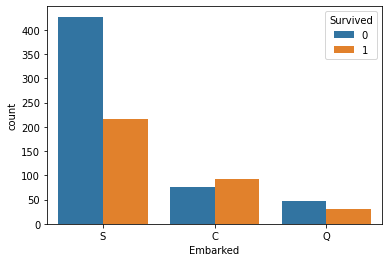

In [134]:
sns.countplot(data=df, x="Embarked", hue="Survived")

Kasih Penjelasan Kolom dengan cara melihat sumbernya dataset
Maksud dari setiap kolom itu apa

## Data Preparation

In [135]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
df.drop(columns=["Cabin"], inplace=True)

In [137]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [138]:
df.Age = df.Age.fillna(df.Age.mean())
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [139]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [140]:
# Hapus kolom kurang penting
# Kita hapus passange id sama name
df.drop(columns=["PassengerId","Name"])

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [141]:
# get dummies
df2 = pd.get_dummies(df)

In [142]:
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [143]:
target = df2.Survived
data = df2.drop(columns=["Survived"])
data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.000000,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.000000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,19.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,3,29.699118,1,2,23.4500,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,890,1,26.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
# Materi SKlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [145]:
data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.000000,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.000000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,19.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,3,29.699118,1,2,23.4500,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,890,1,26.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
